In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 读入训练数据

In [7]:
train=np.loadtxt('click.csv',delimiter=',',skiprows=1)

函数loadtxt用于从文本加载数据;
delimiter分隔符格;这里的skiprows是指跳过前1行, 如果设置skiprows=2, 就会跳过前两行

Python中提供了list容器，可以当作数组使用。但列表中的元素可以是任何对象，因此列表中保存的是对象的指针，这样一来，为了保存一个简单的列表[1,2,3]。就需要三个指针和三个整数对象。对于数值运算来说，这种结构显然不够高效。
Python虽然也提供了array模块，但其只支持一维数组，不支持多维数组，也没有各种运算函数。因而不适合数值运算。


In [8]:
train_x = train[:,0];
train_y = train[:,1];

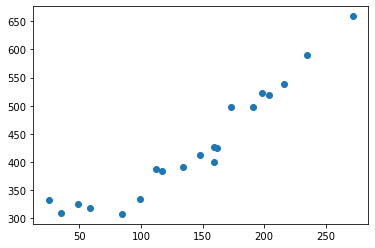

In [9]:
plt.plot(train_x,train_y,'o')

# 1. 用一次函数拟合

#参数初始化

In [10]:
theta0=np.random.rand()
theta1=np.random.rand()

#预测函数

In [11]:
def f(x):
    return theta0+theta1*x

#目标函数

In [12]:
def E(x,y):
    return 0.5*np.sum((y-f(x))**2)

#数据标准化
z=(x-mu)/sigma      sigma ：标准差

In [13]:
mu=train_x.mean()
sigma=train_x.std()

In [14]:
def standardize(x):
    return (x-mu)/sigma

In [15]:
train_z=standardize(train_x)

#学习率

In [16]:
ETA = 1e-3

In [17]:
#误差的差值
diff=1

#更新次数
count=0


In [ ]:
# 直到误差的差值小于0.01为止，重复参数更新
error = E(train_z,train_y)
while diff>1e-2:
    # 更新参数并保存到临时变量，注意，计算更新的Theta1的时候不要用最新的theta0
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z)-train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z)-train_y)*train_z)
    
    # 更新参数
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    
    # 计算与上一次误差的差值
    current_error = E(train_z,train_y)
    diff  = error - current_error
    error = current_error
    
    # 输出日志
    count += 1
    log = '第{}次：theta0 = {:.3f}, theta1 = {:.3f}, 差值={: .4f}'
    print(log.format(count,theta0,theta1,diff))

# 绘图确认

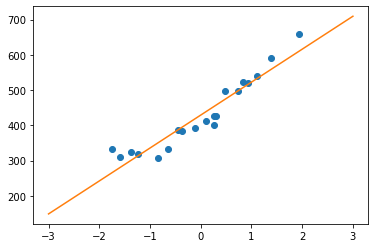

In [21]:
x = np.linspace(-3,3,100)
plt.plot(train_z,train_y,'o')
plt.plot(x,f(x))
plt.show()